<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/11-support-vector-machines/02_nonlinear_classification_with_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Non-Linear classification with SVM

##Setup

In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC

random.seed(0)

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_11_Support_Vector_Machines/utils.py

In [4]:
import utils

##Building Non-Linear dataset

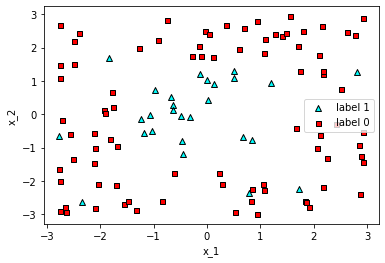

In [7]:
rows = []

#Adding points
for i in range(100):
  x = 6*random.random()-3
  y = 6*random.random()-3
  z = int((x)**2+y**2 < 2.8)
  rows.append([x,y,z])

#Adding noise
for i in range(10):
  x = 6*random.random()-3
  y = 6*random.random()-3
  z = random.randint(0,1)
  rows.append([x,y,z])

    
df_one_circle = pd.DataFrame(rows, columns=['x_1', 'x_2', 'y'])

utils.plot_points(df_one_circle[['x_1', 'x_2']], df_one_circle['y'])

In [8]:
# creating feature and label set 
features = np.array(df_one_circle[["x_1", "x_2"]])
labels = np.array(df_one_circle["y"])

##Building SVM with polynomial kernels

Polynomial kernel of degree = 2
Accuracy: 0.9272727272727272


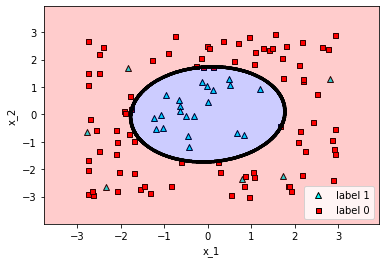

In [20]:
# Degree = 2
svm_degree_2 = SVC(kernel="poly", degree=2)
svm_degree_2.fit(features, labels)

print("Polynomial kernel of degree = 2")
print(f"Accuracy: {svm_degree_2.score(features, labels)}")
utils.plot_model(features, labels, svm_degree_2)

Polynomial kernel of degree = 4
Accuracy: 0.7545454545454545


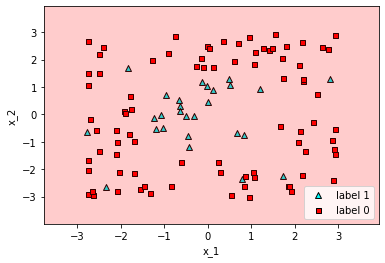

In [18]:
# Degree = 4
svm_degree_4 = SVC(kernel="poly", degree=4)
svm_degree_4.fit(features, labels)

print("Polynomial kernel of degree = 4")
print(f"Accuracy: {svm_degree_4.score(features, labels)}")
utils.plot_model(features, labels, svm_degree_4)

##Building SVM with rbf kernels

Let's build a two-circles dataset.

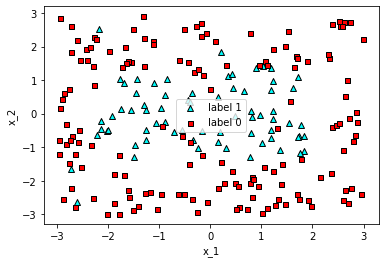

In [21]:
rows = []

#Adding points
for i in range(200):
  x = 6*random.random()-3
  y = 6*random.random()-3
  z = int(((x-1)**2+y**2 < 2) or ((x+1)**2+y**2 < 2))
  rows.append([x,y,z])

#Adding noise
for i in range(20):
  x = 6*random.random()-3
  y = 6*random.random()-3
  z = random.randint(0,1)
  rows.append([x,y,z])

    
df_two_circles = pd.DataFrame(rows, columns=['x_1', 'x_2', 'y'])

utils.plot_points(df_two_circles[['x_1', 'x_2']], df_two_circles['y'])

In [22]:
features = np.array(df_two_circles[['x_1', 'x_2']])
labels = np.array(df_two_circles['y'])

Let's try with the gamma parameter for overfitting and underfitting with the RBF kernel.

Gamma = 0.1
Accuracy: 0.8818181818181818


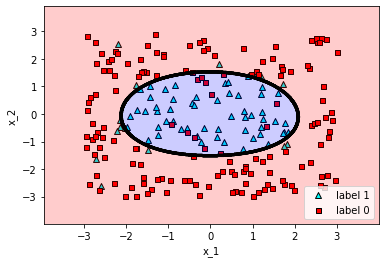

In [23]:
# gamma = 0.1
svm_gamma_01 = SVC(kernel="rbf", gamma=0.1)
svm_gamma_01.fit(features, labels)

print("Gamma = 0.1")
print(f"Accuracy: {svm_gamma_01.score(features, labels)}")
utils.plot_model(features, labels, svm_gamma_01)

Gamma = 1
Accuracy: 0.9363636363636364


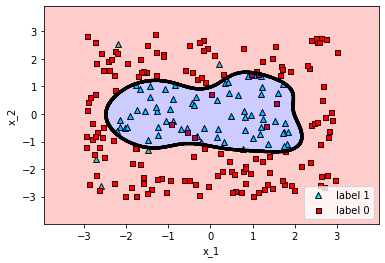

In [24]:
# gamma = 1
svm_gamma_1 = SVC(kernel="rbf", gamma=1)
svm_gamma_1.fit(features, labels)

print("Gamma = 1")
print(f"Accuracy: {svm_gamma_1.score(features, labels)}")
utils.plot_model(features, labels, svm_gamma_1)

Gamma = 10
Accuracy: 0.9636363636363636


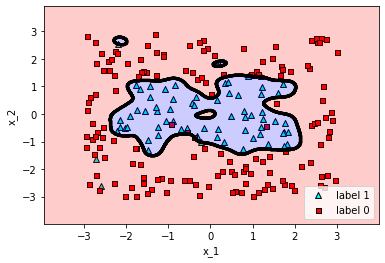

In [25]:
# gamma = 10
svm_gamma_10 = SVC(kernel="rbf", gamma=10)
svm_gamma_10.fit(features, labels)

print("Gamma = 10")
print(f"Accuracy: {svm_gamma_10.score(features, labels)}")
utils.plot_model(features, labels, svm_gamma_10)

Gamma = 100
Accuracy: 0.9954545454545455


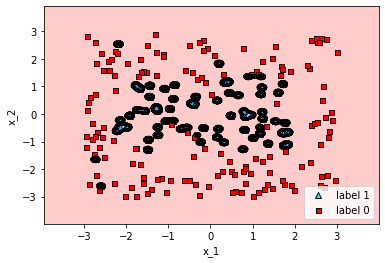

In [26]:
# gamma = 100
svm_gamma_100 = SVC(kernel="rbf", gamma=100)
svm_gamma_100.fit(features, labels)

print("Gamma = 100")
print(f"Accuracy: {svm_gamma_100.score(features, labels)}")
utils.plot_model(features, labels, svm_gamma_100)

In practice, the wideness of our radial basis functions is something we want to
tune. For this, we use a parameter called the gamma parameter. 

When gamma is small, the surface
formed is very wide, and when it is large, the surface is very narrow.

Notice that for a very small value of gamma, the model overfits, because the curve is too simple, and
it doesn’t classify our data well. 

For a large value of gamma, the model vastly overfits, because it builds
a tiny mountain for each triangle and a tiny valley for each square. This makes it classify almost everything
as a square, except for the areas just around the triangles. 

A medium value of gamma seems to
work well, because it builds a boundary that is simple enough, yet classifies the points correctly.